<table>
  <tr>
    <td> <b> Roll no.: </b> N031 </td>
    <td> <b> Name: </b> Shourya Gupta </td>
  </tr>
  <tr>
    <td> <b> Program and Division: </b> MBA Tech CE D</td>
    <td> <b> Batch: </b> B1 </td>
  </tr>   
</table>

# **Experiment 08**

## **Transfer Learning**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

### **Step 1: Load the VGG16 model from keras  and explore the parameters and the layers in the model.**

In [ ]:
model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

### **Step 2: Using Pre-trained model as for prediction.**

**a.	Load an image from file and pre-process it to prepare it to be applied to the model.**

In [ ]:
image_path = '/content/image.jpg'  # Replace with your image path
img = load_img(image_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

**b.	Predict the class of the image using VGG 16**

In [ ]:
preds = model.predict(x)
decoded_preds = decode_predictions(preds, top=3)[0]

35363/35363 [==============================] - 0s 0us/step


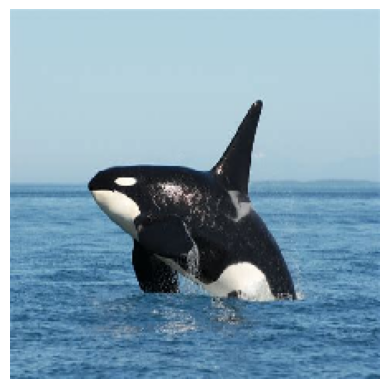

Predictions:
1. killer_whale: 0.998
2. grey_whale: 0.001
3. magpie: 0.000


In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

print('Predictions:')
for i, (imagenet_id, label, score) in enumerate(decoded_preds):
    print(f'{i+1}. {label}: {score:.3f}')

### **Step 3: Using pre-trained model as feature extractor.**

**a.	Change the layers of the VGG126 model.**

In [ ]:
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

**b.	Use the model as feature extractor.**

In [ ]:
features = feature_extractor.predict(x)
print("Feature shape:", features.shape)

1/1 [==============================] - 0s 239ms/step
Feature shape: (1, 4096)


### **Step 4: Add new layers to the model and summarize the parameters.**

In [ ]:
new_model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(1024, activation='relu'),  # Add a dense layer
    tf.keras.layers.Dense(10, activation='softmax')  # Add a classification layer for 10 classes
])

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4096)              134260544 
                                                                 
 dense (Dense)               (None, 1024)              4195328   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 138466122 (528.21 MB)
Trainable params: 138466122 (528.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Step 5: Define the layers which are trainable.**

In [ ]:
for layer in feature_extractor.layers:
  layer.trainable = False

new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## **Observation and Learning**

It has been observed that the VGG16 model which is pre-trained on the ImageNet dataset accurately identified the type of whale in the uploaded image, highlighting its ability on unseen data. VGG16 can be used as a feature extractor for extracting meaningful representations from images.

## **Conclusion**

Explored the VGG-16 model, used it for image classification. Modified it to work as feature extractor.

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>